# Сборный проект

 **Описание проекта**  
На основании данных из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель исследования: установление взаимосвязей показателей и проверка гипотез с целью помощи развитию бизнеса по продаже компьютерных игр.
План исследования:
1. Изучение общей информации о данных
2. Предобработка данных
3. Исследовательский анализ данных:
   - изучение параметров; 
   - изучение зависимостей между параметрами
4. Проверка гипотез
5. Оформление общего вывода


### Шаг. Загрузка данных

На первом этапе добавляем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st

Считаем CSV-файлы с данными с помощью библиотеки pandas,сохраним их в датафреймы. Выведем и изучим общую информацию о  датафрейме

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()
display(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод:** 
1. Пропущенные значения есть в столбцах год релиза, оценка критиков, оценка пользователей и рейтинг.
2. Тип данных год релиза необходимо привести к целочисленному.
3. Необходимо привести названия столбцов к нижнему регистру.

### Шаг. Подготовка данных данных

#### Проверим данные на дубликаты

Проверим на явные дубликаты

In [3]:
games.duplicated().sum()

0

In [4]:
game = games.loc[:, 'Name':'Year_of_Release']
display(game)

,Name,Platform,Year_of_Release
0,Wii Sports,Wii,2006.0
1,Super Mario Bros.,NES,1985.0
2,Mario Kart Wii,Wii,2008.0
3,Wii Sports Resort,Wii,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996.0
...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0
16711,LMA Manager 2007,X360,2006.0
16712,Haitaka no Psychedelica,PSV,2016.0
16713,Spirits & Spells,GBA,2003.0


In [5]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

In [6]:
check_columns(game)

Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


Неявных дубликатов также не выявлено, видим nan в столбце с годами релиза.

In [7]:
temp = games.copy()
temp[temp[['Name', 'Platform','Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


#### Заменим названия столбцов (приведем к нижнему регистру)

In [8]:
games.columns = games.columns.str.lower()
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### Преобразуем данные в нужные типы, исходя из представленных данных:

In [9]:
#games['year_of_release'] = games['year_of_release'].astype('int')

В столбце год релиза невозможно преобразовать число с плавающей запятой NaN в целое число. Проработаем его в дальнейшем.

Обработаем пропуски
Узнаем количество пропусков по столбцам:

In [10]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропущенные значения в столбцах name и year_of_release можно удалить,т.к. их незначительное количество (0,01% и 1,6% соответственно) существенно не повлияет на общие показатели.

In [11]:
games.dropna(subset=['name'], inplace=True)
games.dropna(subset=['year_of_release'], inplace=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Преобразуем значения столбца year_of_release в целочисленные:

In [12]:
games['year_of_release'] = games['year_of_release'].astype('int')
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Пропуски в столбцах с оценками и рейтингом корректно не заполнить, кроме того, игра может быть совсем без оценок и рейтинга, поэтому пропуски в этих столбцах оставляем.

In [13]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.3       2
0.9       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В столбце user_score 2424 строки имеют значение tbd, что можно расшифровать как to be determined = будет определено, т.е. оценка ожидается, поэтому эти значения можно заменить на NAN. И поменяем тип столбца на вещественный.

In [14]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

In [15]:
games['user_score'] = games['user_score'].astype('float64')

#### Расчёт суммарных продаж:

In [16]:
games['revenue'] = games.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод:**
1. Дубликатов выявлено не было, как явных, так и неявных.
2. Были заменены названия столбцов (приведены к нижнему регистру).
3. Были удалены пропуски в столбцах name, genre, year_of_release. Пропущенные значения в столбцах name и year_of_release можно удалить,т.к. их незначительное количество (0,01% и 1,6% соответственно) существенно не повлияет на общие показатели.
4. Значения столбца year_of_release были преобразованы в целочисленные.
5. Пропуски в столбцах с оценками и рейтингом корректно не заполнить, кроме того, игра может быть совсем без оценок и рейтинга, поэтому пропуски в этих столбцах оставили.
6. В столбце user_score 2424 строки имеют значение tbd, что можно расшифровать как to be determined = будет определено, т.е. оценка ожидается, поэтому эти значения можно заменить на NAN. И поменяли тип столбца на вещественный.
7. Были подсчитаны суммарные продажи и добавлен столбец в датафрейм с их значениями.

In [17]:

# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  revenue          16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Шаг.  Исследовательский анализ данных

</font><font color='Blue'><b>Комментарий студента</b></font><br>

#### Cколько игр выпускалось в разные периоды

Посмотрим сколько игр выпускалось в разные периоды

In [18]:
games.value_counts(ascending=True).groupby('year_of_release').agg(['count'])

,count
year_of_release,
1985,1
1988,1
1992,1
1994,1
1996,7
1997,13
1998,25
1999,30
2000,102


Посмотрим на графике

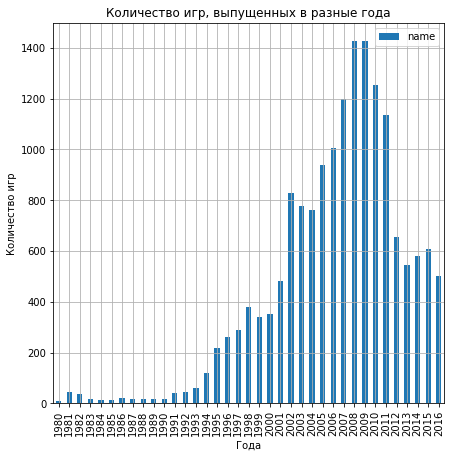

In [19]:
games.pivot_table(index='year_of_release',values='name', aggfunc='count').plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Количество игр, выпущенных в разные года")
plt.xlabel('Года')
plt.ylabel('Количество игр')
plt.show()

Массовый выпуск игр начался с 2000 года, наибольших значений достиг в 2008-2009 годах, затем наблюдался спад. Игры, выпущенные до 2000 г. ввиду своей малочисленности, не оказывают влияния на показатели и не важны для анализа. 

#### Как менялись продажи по платформам 

In [20]:
games.pivot_table(index='platform',values='revenue',aggfunc='count')

,revenue
platform,
2600,116
3DO,3
3DS,512
DC,52
DS,2121
GB,97
GBA,811
GC,542
GEN,27


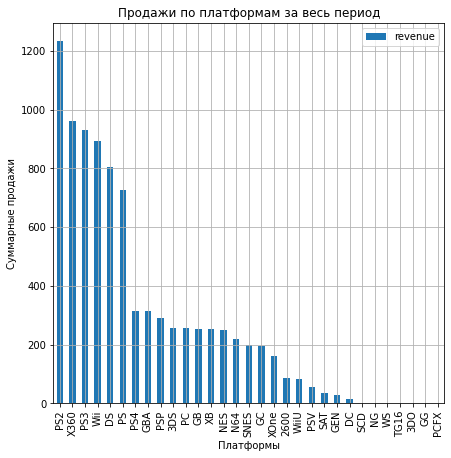

In [21]:
games.pivot_table(index='platform', values='revenue', aggfunc='sum').sort_values(by='revenue', ascending=False).plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Продажи по платформам за весь период")
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи")
plt.show()

Выберем платформы с наибольшими продажами

In [22]:
platforms_top = games.pivot_table(index='platform', values='revenue',aggfunc='sum').sort_values(by='revenue', ascending=False).head(6)
platforms_top = platforms_top.reset_index().rename_axis(None, axis=1)
platforms_top

,platform,revenue
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


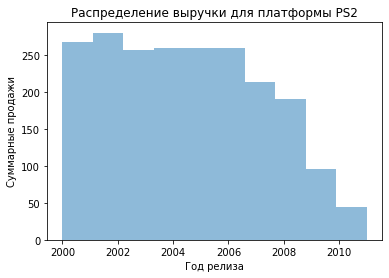

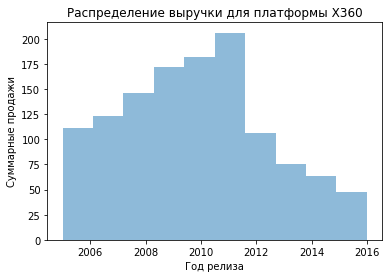

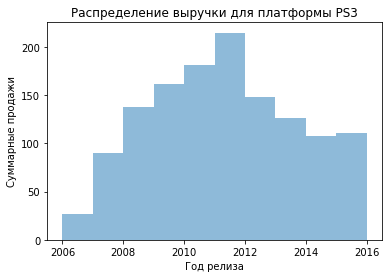

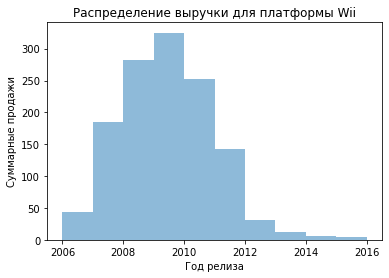

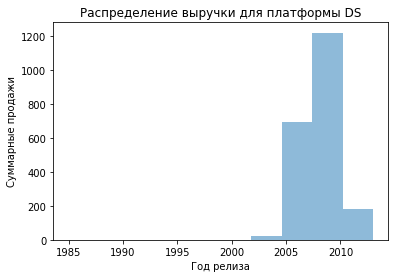

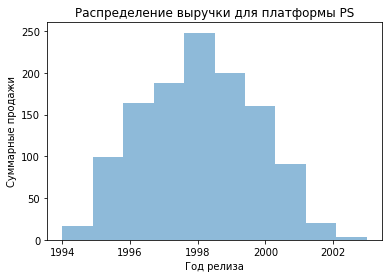

In [23]:
plat = platforms_top['platform'].unique()
for i in plat:
    platform_df = games[games['platform'] == i]
    plt.figure(figsize=(6, 4))
    plt.hist(platform_df['year_of_release'], alpha=0.5)
    plt.xlabel('Год релиза')
    plt.ylabel('Суммарные продажи')
    plt.title(f'Распределение выручки для платформы {i}')
    plt.show()

Попробуем разобраться с таким артефактом у платформы DS, как выпуск игры в 1985 г. Это ошибка, так как в 1985 году этой платформы еще не существовало.

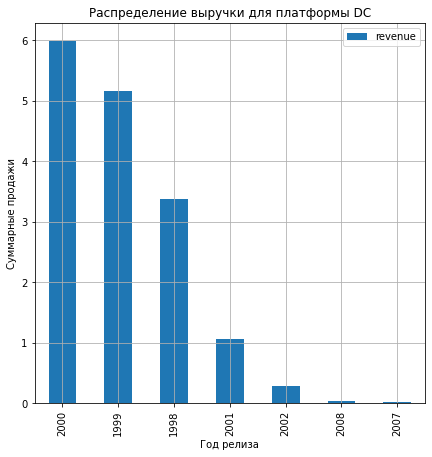

In [24]:
games_dc = games[(games['platform'] == 'DC') & (games['year_of_release'] != '1985')]
games_dc.pivot_table(index='year_of_release', values='revenue', aggfunc='sum').sort_values(by='revenue', ascending=False).plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Распределение выручки для платформы DC")
plt.xlabel("Год релиза")
plt.ylabel("Суммарные продажи")
plt.show()

Исходя из представленных графиков, можно сделать вывод, что характерным сроком работы платформы можно обозначить в 10-11 лет. 

In [25]:

temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0


Исходя из данных были выделены 6 платформ с наибольшими суммарными продажами. Следует отметить, что самая продаваемая за рассматриваемый период была платформа PS2, что обусловлено в первую очередь длительностью продаж данной платформы в рассматриваемом периоде (с 2000 г.). В динамике наблюдается спад продаж этой платформы с выходом новых платформ. 
Благодаря визуализации данных был выявлен артефакт выпуска игры на платформе DC в 1985 г., когда этой платформы еще не существовало. Срок жизни платформы можно определить в 7 лет.

#### Анализ данных за актуальный период

Для прогноза на 2017 год рассмотрим актуальные данные за последние 4 года, тк для бизнеса обычно актуальны данные за 3 последних года, но за 2016 данные неполные.

In [26]:
games_2013_2016 = games.query('year_of_release > 2012')
games_2013_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Посмотрим какие платформы лидируют по продажам за выбранный период 

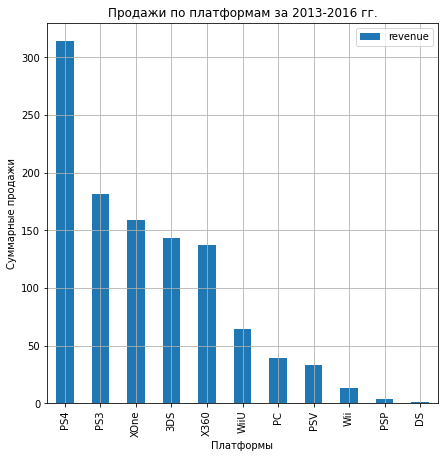

In [27]:
games_2013_2016.pivot_table(index='platform', values='revenue', aggfunc='sum').sort_values(by='revenue', ascending=False).plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Продажи по платформам за 2013-2016 гг.")
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи")
plt.show()

Видим, как изменилась ситуация по лидерам при выборе актуального периода. За последние 4 года наибольшие продажи были у платформы PS4, почти в 2 раза меньше продажи у PS3.

Выведем динамику продаж для всех платформ за выбранный период.

In [28]:
best_sales_platform = pd.pivot_table(games_2013_2016, index=['platform','year_of_release'],values='revenue', aggfunc = 'sum')
best_sales_platform

revenue
platform year_of_release         
3DS      2013               56.57
         2014               43.76
         2015               27.78
         2016               15.14
DS       2013                1.54
PC       2013               12.38
         2014               13.28
         2015                8.52
         2016                5.25
PS3      2013              113.25
         2014               47.76
         2015               16.82
         2016                3.60
PS4      2013               25.99
         2014              100.00
         2015              118.90
         2016               69.25
PSP      2013                3.14
         2014                0.24
         2015                0.12
PSV      2013               10.59
         2014               11.90
         2015                6.25
         2016                4.25
Wii      2013                8.59
         2014                3.75
         2015                1.14
         2016                0.18
WiiU     2013               21.65
         2014               22.03
         2015               16.35
         2016                4.60
X360     2013               88.58
         2014               34.74
         2015               11.96
         2016                1.52
XOne     2013               18.96
         2014               54.07
         2015               60.14
         2016               26.15

По данным таблицы видно, как меняются объемы продаж в зависимости от обновления платформ. Так, в 2013 году лидером продаж была платформа PS3, с 2014 году лидирует уже PS4, продажи PS3 соответственно снижаются. Аналогичная ситуация с X360 и XOne. Поскольку данные за 2016 неполные, не будем их учитывать при анализе. Таким образом, рост наблюдается только у двух платформ PS4 и XOne. 

#### Анализ с использованием диаграммы размаха

Построим "ящики с усами" для платформ, которые выпускали игры с 2013 по 2016 г.

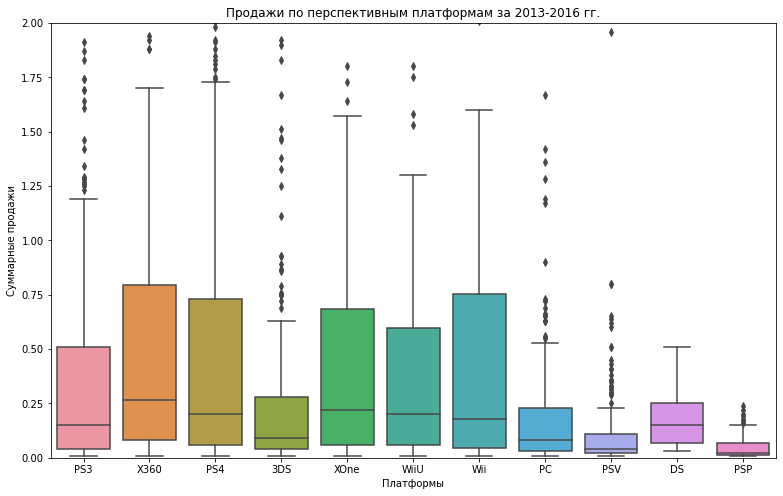

In [29]:
platform_name =  ['X360','XOne', 'PS3','PS4', '3DS', 'DS', 'PC','PSP', 'PSV', 'Wii','WiiU']
plt.figure(figsize=(13, 8))
sns.boxplot(data = games_2013_2016.query('platform in @platform_name'), y = 'revenue', x='platform')\
.set(title = 'Продажи по перспективным платформам за 2013-2016 гг.', xlabel = 'Платформы', ylabel = 'Суммарные продажи')
plt.ylim(0, 2);

Построим диаграмму размаха со всеми максимумами продаж за актуальный период, чтобы увидеть выбросы.

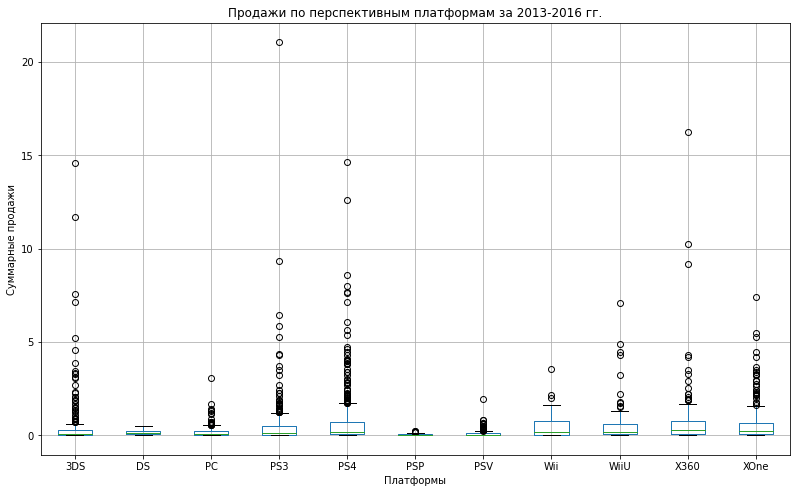

In [30]:
games_2013_2016[['revenue', 'platform']].boxplot(column='revenue', by='platform', figsize=(13,8))
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('Продажи по перспективным платформам за 2013-2016 гг.')
plt.suptitle('')
plt.show()

Лидеры продаж PS4 и X360. По средним показателям продажи выше у X360, за ним следует Wii и PS4.

#### Влияние на продажи оценок критиков и пользователей

Посмотрим, как влияют на продажи внутри PS4 отзывы критиков

In [31]:
PS4_ratings = games_2013_2016.query('platform =="PS4"')
critic_PS4_ratings = pd.pivot_table(PS4_ratings, index=['critic_score'],values='revenue', aggfunc = 'sum')
critic_PS4_ratings

,revenue
critic_score,
19.0,0.12
25.0,0.06
31.0,0.02
32.0,0.20
38.0,0.16
42.0,0.07
43.0,0.29
44.0,0.09
45.0,0.14


Построим диаграмму рассеяния

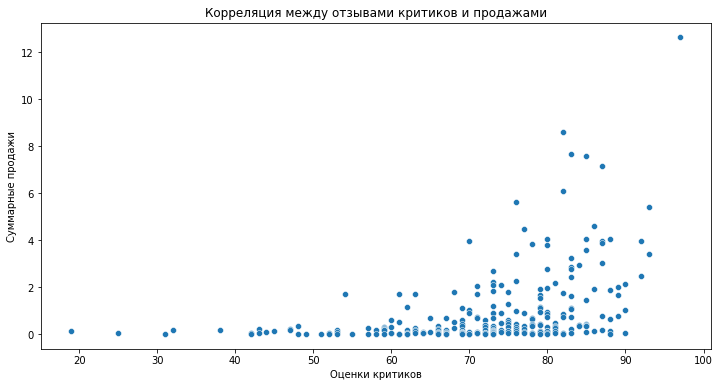

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='revenue', data=PS4_ratings)
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.title('Корреляция между отзывами критиков и продажами')
plt.show()

Рассчитаем коэффициент корреляции

In [33]:
PS4_ratings['critic_score'].corr(PS4_ratings['revenue'])

0.40656790206178095

Посмотрим, как влияют на продажи внутри PS4 отзывы пользователей

In [34]:
user_PS4_ratings = pd.pivot_table(PS4_ratings, index=['user_score'],values='revenue', aggfunc = 'sum')
user_PS4_ratings

,revenue
user_score,
1.5,0.20
1.9,0.06
2.0,0.23
2.3,0.01
2.7,0.24
2.9,0.16
3.0,0.06
3.3,0.30
3.4,5.49


Построим диаграмму рассеяния

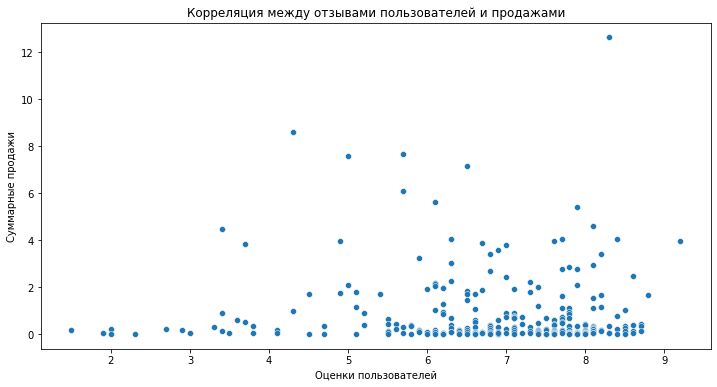

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='revenue', data=PS4_ratings)
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Корреляция между отзывами пользователей и продажами')
plt.show()

Рассчитаем коэффициент корреляции

In [36]:
PS4_ratings['user_score'].corr(PS4_ratings['revenue'])

-0.031957110204556376

Зависимость между отзывами и продажами PS4 невысокая, однако прослеживается. Отзывы пользователей на продажи практически не влияют, даже наблюдается очень небольшая обратная зависимость. 

#### Анализ продажам игр на других платформах

Соотнесем выводы с продажами игр на других платформах


PS3:
Коэффициент корреляции между user_score и суммарными продажами: 0.0
Коэффициент корреляции между critic_score и суммарными продажами: 0.33

X360:
Коэффициент корреляции между user_score и суммарными продажами: -0.01
Коэффициент корреляции между critic_score и суммарными продажами: 0.35

Wii:
Коэффициент корреляции между user_score и суммарными продажами: 0.68
Коэффициент корреляции между critic_score и суммарными продажами: nan

PSP:
Коэффициент корреляции между user_score и суммарными продажами: -1.0


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Коэффициент корреляции между critic_score и суммарными продажами: nan


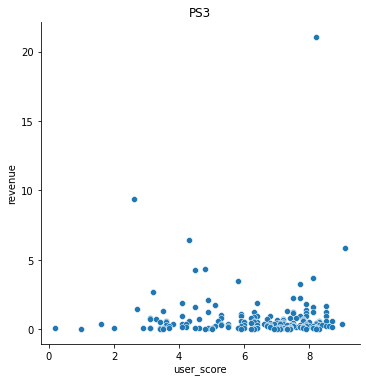

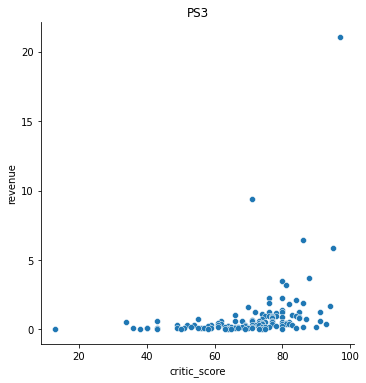

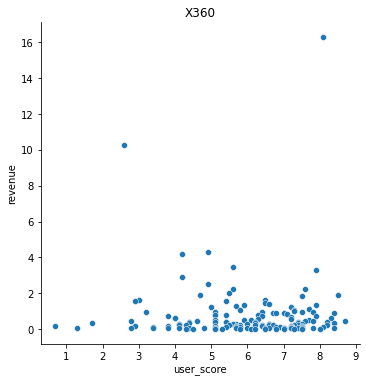

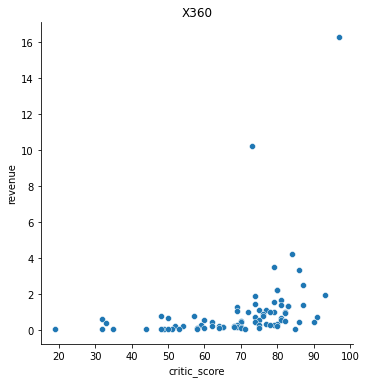

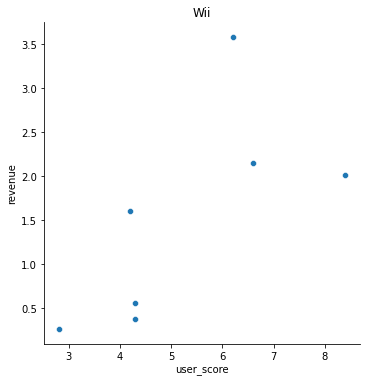

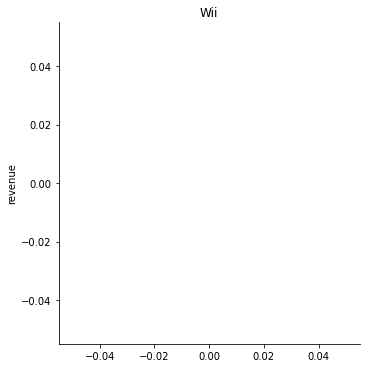

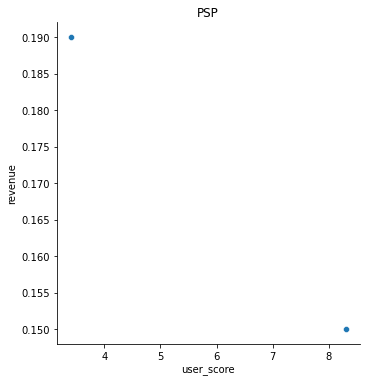

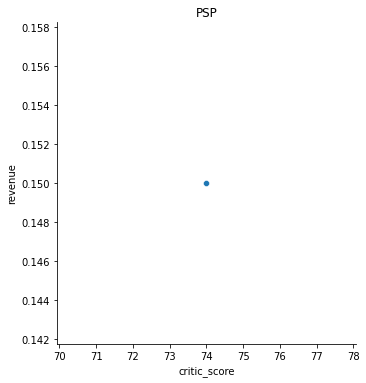

In [37]:
for platform in ['PS3', 'X360', 'Wii', 'PSP']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = games_2013_2016.query('platform == @platform')
        print('Коэффициент корреляции между {0} и суммарными продажами: {1}'.\
              format(column, round(temp[column].corr(temp['revenue']), 2)))
        sns.relplot(x=column, y="revenue", data=temp)
        _ = plt.title(platform)

3DS


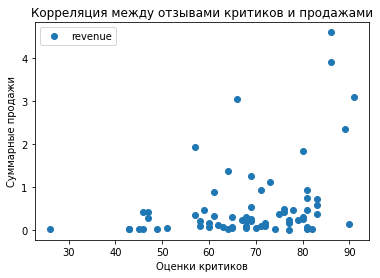

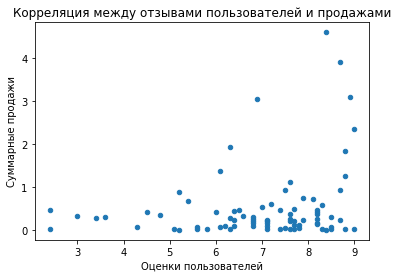

critic_score    0.357057
user_score      0.241504
revenue         1.000000
Name: revenue, dtype: float64
DS


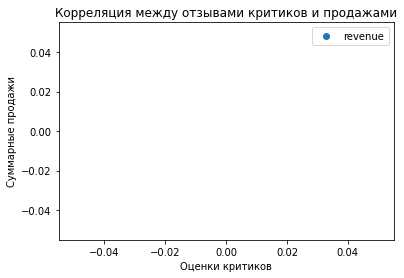

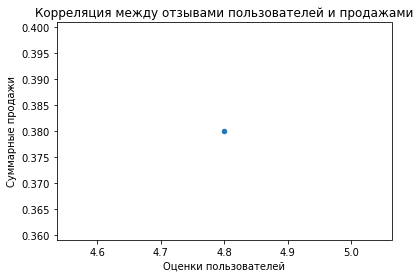

critic_score    NaN
user_score      NaN
revenue         1.0
Name: revenue, dtype: float64
PC


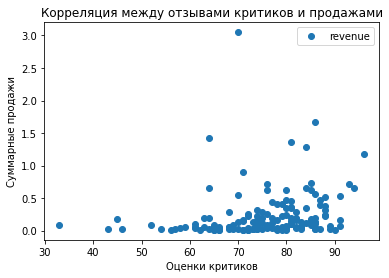

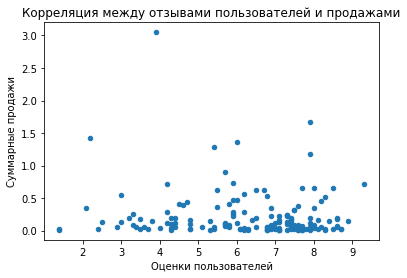

critic_score    0.196030
user_score     -0.093842
revenue         1.000000
Name: revenue, dtype: float64
PS3


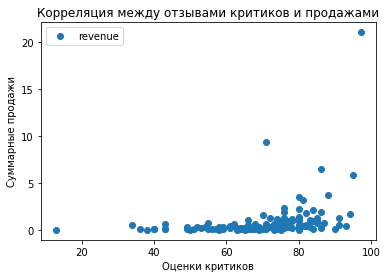

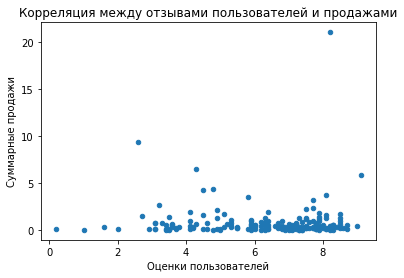

critic_score    0.334285
user_score      0.002394
revenue         1.000000
Name: revenue, dtype: float64
PS4


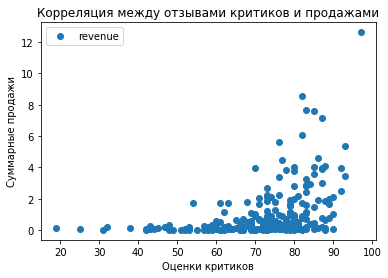

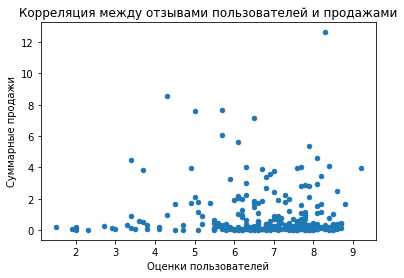

critic_score    0.406568
user_score     -0.031957
revenue         1.000000
Name: revenue, dtype: float64
PSP


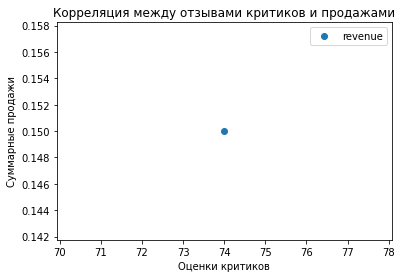

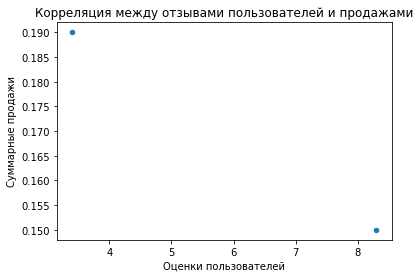

critic_score    NaN
user_score     -1.0
revenue         1.0
Name: revenue, dtype: float64
PSV


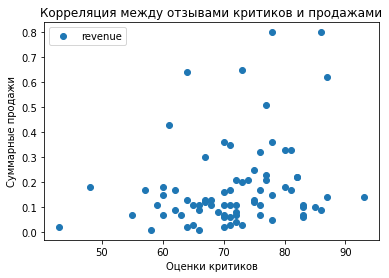

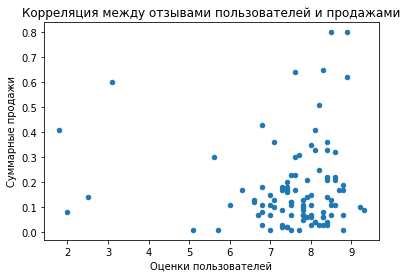

critic_score    0.254742
user_score      0.000942
revenue         1.000000
Name: revenue, dtype: float64
Wii


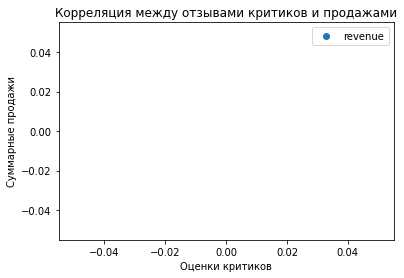

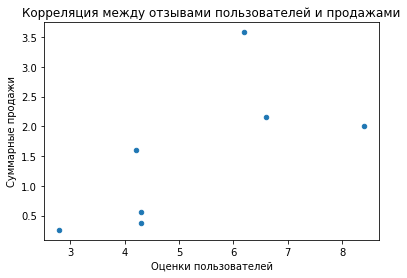

critic_score         NaN
user_score      0.682942
revenue         1.000000
Name: revenue, dtype: float64
WiiU


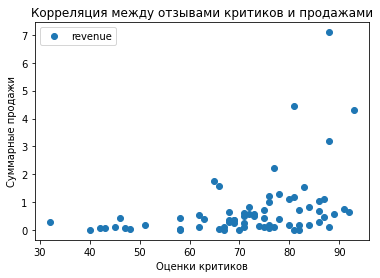

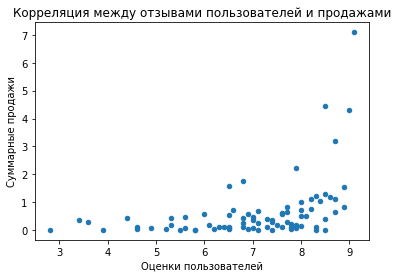

critic_score    0.376415
user_score      0.419330
revenue         1.000000
Name: revenue, dtype: float64
X360


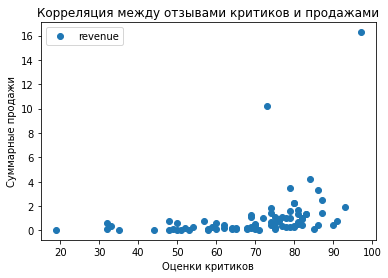

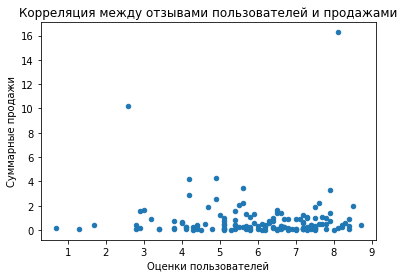

critic_score    0.350345
user_score     -0.011742
revenue         1.000000
Name: revenue, dtype: float64
XOne


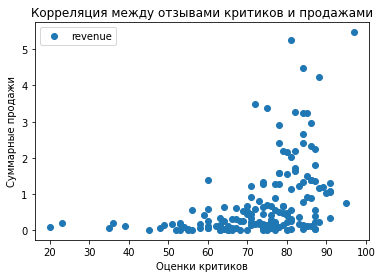

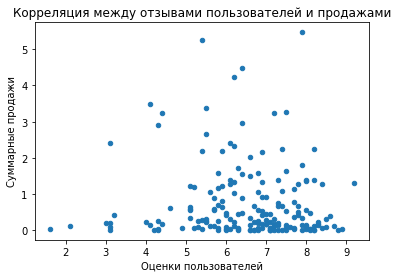

critic_score    0.416998
user_score     -0.068925
revenue         1.000000
Name: revenue, dtype: float64


In [38]:
for platform, games_on_platform in games_2013_2016.groupby('platform'):
    print('='*30)
    print(platform)
    games_on_platform.plot(x='critic_score', y='revenue', style='o')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Суммарные продажи')
    plt.title('Корреляция между отзывами критиков и продажами')
    plt.show()
    games_on_platform.plot(kind='scatter', x='user_score', y='revenue')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Суммарные продажи')
    plt.title('Корреляция между отзывами пользователей и продажами')
    plt.show()
    print(games_on_platform[['critic_score', 'user_score', 'revenue']].corr()['revenue'])
    

 У PS3, XOne, X360, WiiU, 3DS прослеживается невысокая зависимость продаж от оценки критиков. А взаимосвязи между оценками пользователей и продажами практически нет, лиюо очень слабая. Выделяется только WiiU с достаточно высокой корреляцей между отзывами пользователей и продажами. 

#### Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам:

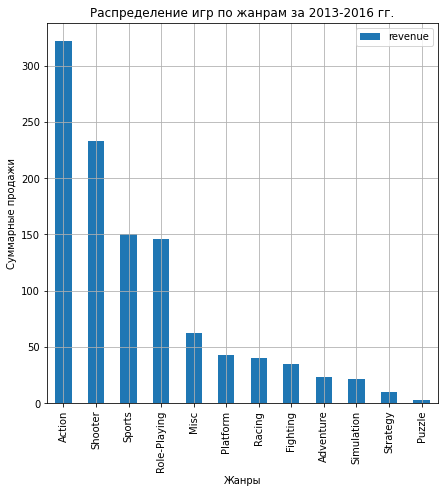

In [39]:
genre_revenue = pd.pivot_table(games_2013_2016, index=['genre'],values='revenue', aggfunc = 'sum').sort_values(by='revenue', ascending=False).plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Распределение игр по жанрам за 2013-2016 гг.")
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.show()


Наибольшие продажи у игр жанра Action, на 2 месте Sports. Наименьшие продажи у Puzzle.


Проведем сравнение медианных продаж, построим диаграммамы размаха

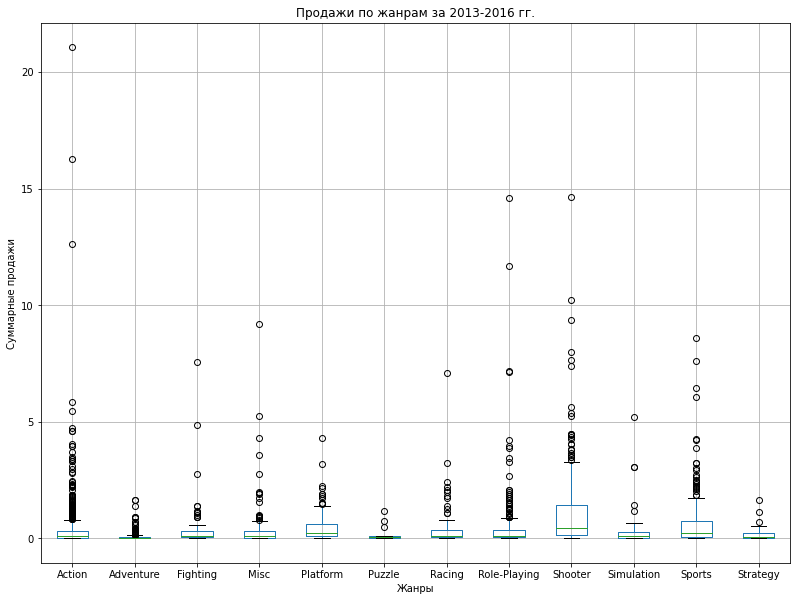

In [40]:
games_2013_2016[['revenue', 'genre']].boxplot(column='revenue', by='genre', figsize=(13,10))
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.title('Продажи по жанрам за 2013-2016 гг.')
plt.suptitle('')
plt.show()

По диаграмме размаха выводы о продажах игр по жанрам иные, чем по предыдущему графику. Медиана и, соответственно, продажи выше у Shooter, на втором месте Sports. У Action большое количество выбросов, что и повлияло на лидерство при расчете максимальных продаж.

**Вывод**: 
1. Массовый выпуск игр начался с 2000 года, наибольших значений достиг в 2008-2009 годах, затем наблюдался спад. Игры, выпущенные до 2000 г. ввиду своей малочисленности, не оказывают влияния на показатели и не важны для анализа.
2.Исходя из представленных данных, можно сделать вывод, что характерным сроком работы платформы можно обозначить в 7 лет. 
3. За последние 4 года наибольшие продажи были у платформы PS4, почти в 2 раза меньше продажи у PS3. По данным видно, как меняются объемы продаж в зависимости от обновления платформ. Так, в 2013 году лидером продаж была платформа PS3, с 2014 году лидирует уже PS4, продажи PS3 соответственно снижаются. Аналогичная ситуация с X360 и XOne. Поскольку данные за 2016 неполные, не будем их учитывать при анлизе. Таким образом, рост наблюдается только у двух платформ PS4 и XOne. 
4. Лидером продаж является X360, затем следует XOne, от которого не намного отстает PS4. 
5. Зависимость между отзывами и продажами PS4 невысокая, однако прослеживается. Отзывы пользователей на продажи практически не влияют, даже наблюдается очень небольшая обратная зависимость. 
6. У PS3, XOne, X360, WiiU, 3DS прослеживается невысокая зависимость продаж от оценки критиков. А взаимосвязи между оценками пользователей и продажами практически нет, лиюо очень слабая. Выделяется только WiiU с достаточно высокой корреляцей между отзывами пользователей и продажами. 
7. Наибольшие продажи у игр жанра Shooter, на 2 месте Sports. Наименьшие продажи у Puzzle.

### Шаг.  Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

Определим для пользователя каждого региона самые популярные платформы (топ 5):

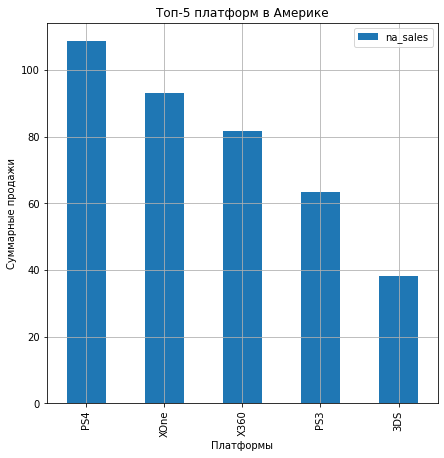

In [41]:
region_na_sales = pd.pivot_table(games_2013_2016,index=['platform'],values=['na_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5);
region_na_sales.plot(grid=True,kind ='bar', figsize=(7, 7))
plt.title("Топ-5 платформ в Америке")
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи");

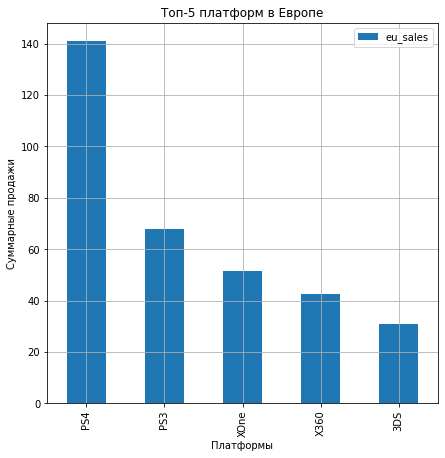

In [42]:
region_eu_sales = pd.pivot_table(games_2013_2016,index=['platform'],values=['eu_sales'], aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head(5);
region_eu_sales.plot(grid=True,kind ='bar', figsize=(7, 7))
plt.title("Топ-5 платформ в Европе")
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи");

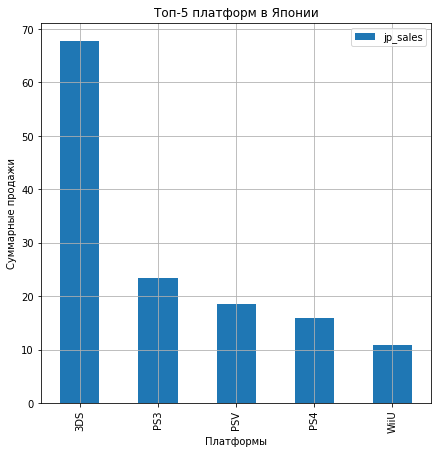

In [43]:
region_jp_sales = pd.pivot_table(games_2013_2016,index=['platform'],values=['jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head(5);
region_jp_sales.plot(grid=True,kind ='bar', figsize=(7, 7))
plt.title("Топ-5 платформ в Японии")
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи");

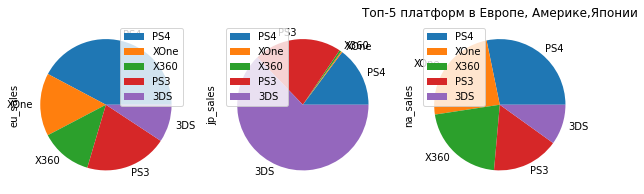

In [44]:
region=games_2013_2016.pivot_table(index=['platform'],values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5);
region.plot(kind='pie',figsize=(10,5),subplots=True);
plt.title("Топ-5 платформ в Европе, Америке,Японии");

Начертим круговую диаграмму для каждого региона

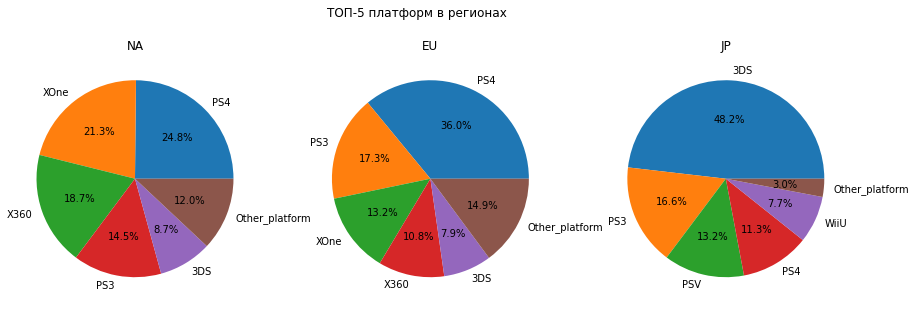

In [45]:
countries = ['na_sales','eu_sales','jp_sales']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
    df_i = (games_2013_2016.groupby('platform')[countries[i]].sum().reset_index().sort_values(countries[i], ascending = False, ignore_index = True).head(5))
    df_i = df_i.append({'platform': 'Other_platform', countries[i]: games_2013_2016[countries[i]].sum()\
                        - df_i[countries[i]].sum()}, ignore_index= True)
    ax[i].pie(df_i[countries[i]], labels = df_i['platform'],autopct='%.1f%%')
    ax[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

В Америке и Европе по продажам лидирует платформа PS4, и состав первой пятерки одинаковый. Но в Америке основными конкурентами PS4 являются XOne и Х360, а в Европе на втором месте по продажам PS3. В Японии безусловным лидером является 3DS, у следующего конкурента PS3 продажи меньше почти в 3 раза.  

#### Самые популярные жанры (топ-5)

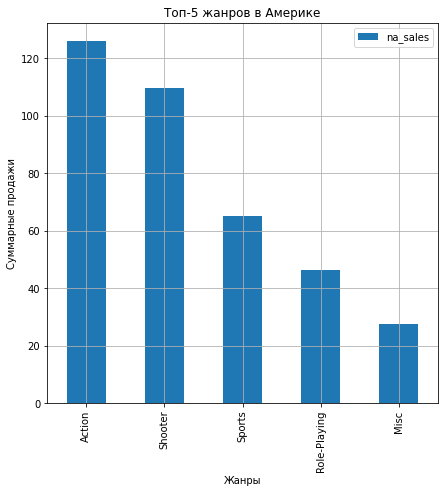

In [46]:
# определим для пользователя каждого региона самые популярные жанры (топ 5):
genre_na_sales = pd.pivot_table(games_2013_2016,index=['genre'],values=['na_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5);
genre_na_sales.plot(grid=True,kind ='bar', figsize=(7, 7))
plt.title("Топ-5 жанров в Америке")
plt.xlabel("Жанры")
plt.ylabel("Суммарные продажи");

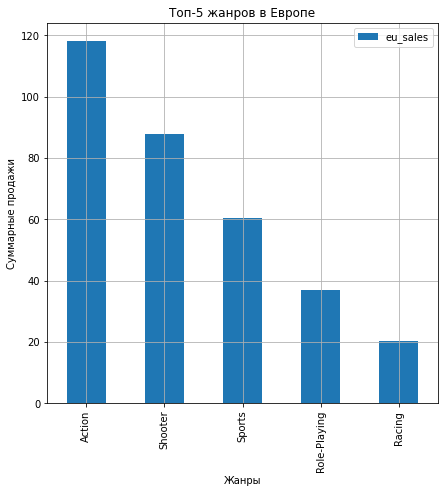

In [47]:
genre_eu_sales = pd.pivot_table(games_2013_2016,index=['genre'],values=['eu_sales'], aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head(5);
genre_eu_sales.plot(grid=True,kind ='bar', figsize=(7, 7))
plt.title("Топ-5 жанров в Европе")
plt.xlabel("Жанры")
plt.ylabel("Суммарные продажи");

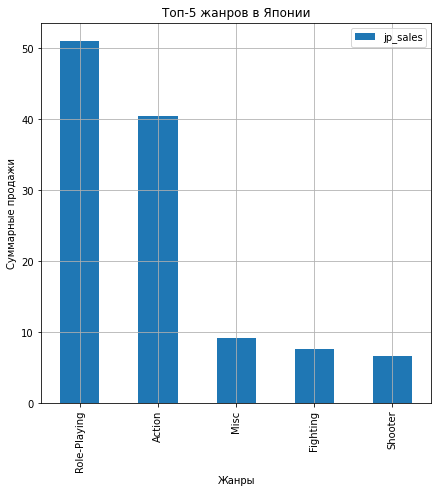

In [48]:
genre_jp_sales = pd.pivot_table(games_2013_2016,index=['genre'],values=['jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head(5);
genre_jp_sales.plot(grid=True,kind ='bar', figsize=(7, 7))
plt.title("Топ-5 жанров в Японии")
plt.xlabel("Жанры")
plt.ylabel("Суммарные продажи");

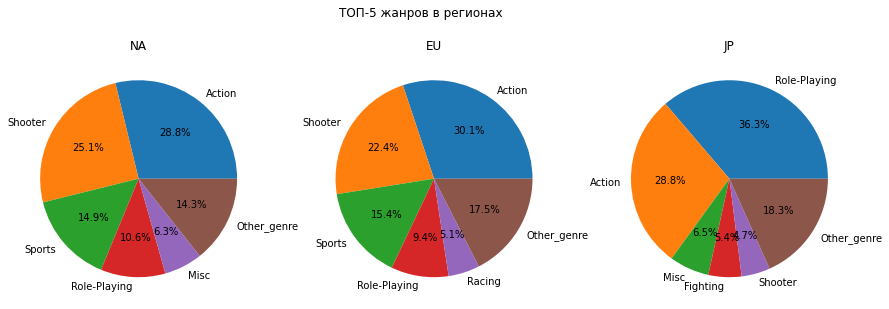

In [49]:
countries = ['na_sales','eu_sales','jp_sales']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
    df_i = (games_2013_2016.groupby('genre')[countries[i]].sum().reset_index().sort_values(countries[i], ascending = False, ignore_index = True).head(5))
    df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_2013_2016[countries[i]].sum()\
                        - df_i[countries[i]].sum()}, ignore_index= True)
    ax[i].pie(df_i[countries[i]], labels = df_i['genre'],autopct='%.1f%%')
    ax[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

С жанрами игр в Америке и Европе похожая ситуация. Первая пятерка популярных жанров почти одинаковая, единственное в Европе еще популярны гонки. В Японии популярны отличные от западных стран жанры. Наиболее популярны Role-Playing, Action. 

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе? 

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе:

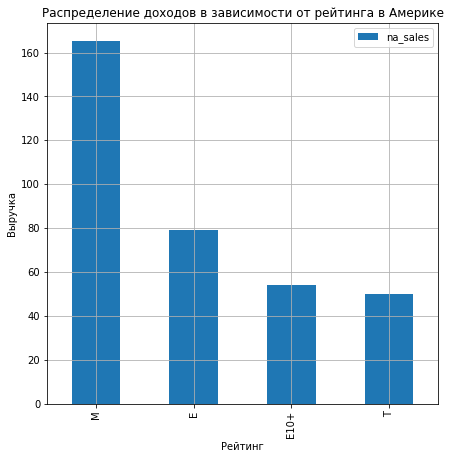

In [50]:
rating_na_sales = pd.pivot_table(games_2013_2016, index=['rating'],values='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Распределение доходов в зависимости от рейтинга в Америке")
plt.xlabel('Рейтинг')
plt.ylabel('Выручка')
plt.show()

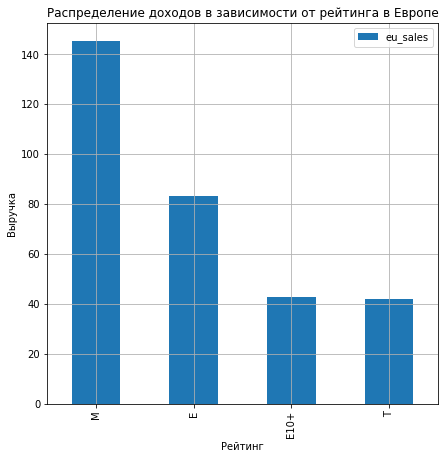

In [51]:
rating_eu_sales = pd.pivot_table(games_2013_2016, index=['rating'],values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Распределение доходов в зависимости от рейтинга в Европе")
plt.xlabel('Рейтинг')
plt.ylabel('Выручка')
plt.show()

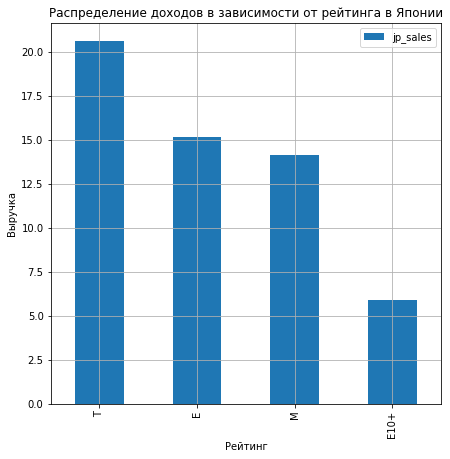

In [52]:
rating_jp_sales = pd.pivot_table(games_2013_2016, index=['rating'],values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).plot(grid=True,kind ='bar', figsize=(7, 7));
plt.title("Распределение доходов в зависимости от рейтинга в Японии")
plt.xlabel('Рейтинг')
plt.ylabel('Выручка')
plt.show()

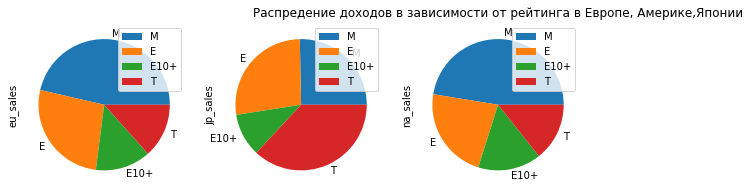

In [53]:
rating=games_2013_2016.pivot_table(index=['rating'],values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5);
rating.plot(kind='pie',figsize=(10,5),subplots=True);
plt.title("Распредение доходов в зависимости от рейтинга в Европе, Америке,Японии");

Снова повторяется ситуация в Америке и Европе, наибольшую выручку приносит продажа игр для взрослых, на втором месте игры для всех. В Японии же на первом месте по продажам игры для подростков, для взрослых на 3 месте.

In [54]:

temp = games_2013_2016.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

977 0.43752798925212716


M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

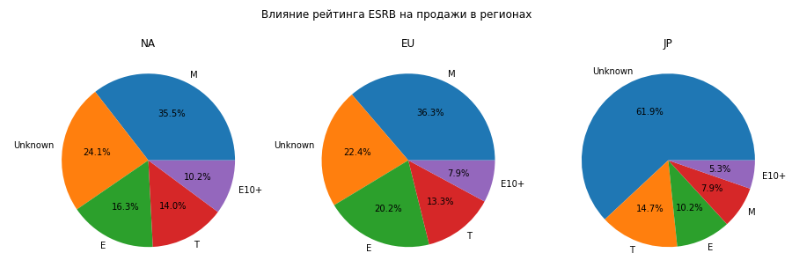

In [1]:
#### Шаг.  Проверка гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза(Н0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза (Н1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [56]:
games_2013_2016_ = games_2013_2016.dropna(subset=['user_score'])

xone = games_2013_2016_.query('platform == "XOne"')
pc = games_2013_2016_.query('platform == "PC"')

rating_users_XOne = xone['user_score'] 
rating_users_PC = pc['user_score']

alpha = 0.05

results = st.ttest_ind(rating_users_XOne, rating_users_PC, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print('Средняя оценка пользователей игр для платформы XOne  - {:.2f}'.format(rating_users_XOne.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(rating_users_PC.mean()))
   

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу
Средняя оценка пользователей игр для платформы XOne  - 6.52
Средняя оценка пользователей игр для платформы PC - 6.27


Не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза(Н0): Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Альтернативная гипотеза (Н1): Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [57]:
action = games_2013_2016_.query('genre == "Action"')
sports = games_2013_2016_.query('genre == "Sports"')

rating_users_action = action['user_score'] 
rating_users_sports = sports['user_score']

alpha = 0.05

results = st.ttest_ind(rating_users_action, rating_users_sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
print('Средняя оценка пользователей игр жанра Action  - {:.2f}'.format(rating_users_action.mean()))
print('Средняя оценка пользователей игр жанра Sports - {:.2f}'.format(rating_users_sports.mean()))

p-значение: 1.4460039700704315e-20
Принимаем альтернативную гипотезу
Средняя оценка пользователей игр жанра Action  - 6.84
Средняя оценка пользователей игр жанра Sports - 5.24


Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные не опровергнута.

Нулевая гипотеза была сфорлирована исходя из предположение, что оценки пользователей схожи у двух популярных платформ и двух популярных жанров. Для проверки обеих гипотез был использован t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.

### Шаг.  Общий вывод 

#### Описание проекта: 
На основании данных из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
#### Порядок обработки аномалий, пропусков и дубликатов, предобработка данных для анализа:
1. Дубликатов выявлено не было
2. Были заменены названия столбцов (приведены к нижнему регистру).
3. Были удалены пропуски в столбцах name, genre, year_of_release. Пропущенные значения в столбцах name и year_of_release можно удалить,т.к. их незначительное количество (0,01% и 1,6% соответственно) существенно не повлияет на общие показатели.
4. Значения столбца year_of_release были преобразованы в целочисленные.
5. Пропуски в столбцах с оценками и рейтингом корректно не заполнить, кроме того, игра может быть совсем без оценок и рейтинга, поэтому пропуски в этих столбцах оставили.
6. В столбце user_score 2424 строки имеют значение tbd, что можно расшифровать как to be determined = будет определено, т.е. оценка ожидается, поэтому эти значения можно заменить на NAN. И поменяли тип столбца на вещественный.
7. Были подсчитаны суммарные продажи и добавлен столбец в датафрейм с их значениями.

####  Анализ:
В ходе анализа были сделаны следующие выводы:
1. Массовый выпуск игр начался с 2000 года, наибольших значений достиг в 2008-2009 годах, затем наблюдался спад. Игры, выпущенные до 2000 г. ввиду своей малочисленности, не оказывают влияния на показатели и не важны для анализа.
2.Исходя из данных были выделены 6 платформ с наибольшими суммарными продажами. Следует отметить, что самая продаваемая за рассматриваемый период была платформа PS2, что обусловлено в первую очередь длительностью продаж данной платформы в рассматриваемом периоде (с 2000 г.). В динамике наблюдается спад продаж этой платформы с выходом новых платформ. 
Благодаря визуализации данных был выявлен артефакт выпуска игры на платформе DC в 1985 г., когда этой платформы еще не существовало. Срок жизни платформы можно определить в 7 лет. 
3. За последние 4 года наибольшие продажи были у платформы PS4, почти в 2 раза меньше продажи у PS3. По данным видно, как меняются объемы продаж в зависимости от обновления платформ. Так, в 2013 году лидером продаж была платформа PS3, с 2014 году лидирует уже PS4, продажи PS3 соответственно снижаются. Аналогичная ситуация с X360 и XOne. Поскольку данные за 2016 неполные, не будем их учитывать при анлизе. Таким образом, рост наблюдается только у двух платформ PS4 и XOne. 
4. По медиане продажи выше у X360, за ним следует Wii и PS4.
5. Зависимость между отзывами и продажами PS4 невысокая, однако прослеживается. Отзывы пользователей на продажи практически не влияют, даже наблюдается очень небольшая обратная зависимость. 
7. Наибольшие продажи у игр жанра Action, на 2 месте Sports. Наименьшие продажи у Strategy.

####  Был составлен портрет пользователя каждого региона:
1. В Америке и Европе по продажам лидирует платформа PS4, и состав первой пятерки одинаковый. Но в Америке основными конкурентами PS4 являются XOne и Х360, а в Европе на втором месте по продажам PS3. В Японии безусловным лидером является 3DS, у следующего конкурента PS3 продажи меньше почти в 3 раза.  
2.С жанрами игр в Америке и Европе похожая ситуация. Первая пятерка популярных жанров почти одинаковая, единственное в Европе еще популярны гонки. В Японии популярны отличные от западных стран жанры. Наиболее популярны Role-Playing, Action. 
3. При исследовании зависимости продаж от рейтинга было установлено, что в Америке и Европе, наибольшую выручку приносит продажа игр для взрослых, на втором месте игры для всех. В Японии же на первом месте по продажам игры для подростков, для взрослых на 3 месте.

#### Проверка гипотез:
1. Не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные не опровергнута.

Наиболее перспективные платформы для рекламы PS4 и XOne. В рекламе на рынках Северной Америки и Европы следует ориентироваться на игры Action, Sport и Shooter в возрастной категории "для взрослых" и для "всех". При рекламе в Японии следует ориентироваться на жанр Role-Playing, Action для возраста от 13 до 17 лет.